# Problem Statement

Title : Predictive analytics for Customer and Product Segmentation in the Retail Industry Using Machine Learning

Datasource Collection : https://www.kaggle.com/datasets/naveenkumar20bps1137/sample-superstore/data


The dataset consist of  :   9994  rows and    21   columns

_______________________________________________________________________________________________________________________________________________

In [1305]:
import numpy as np

In [1306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\rahul\OneDrive\Desktop\Dissertation\code\data\rawData\Customer_Segmentation\Sample - Superstore.csv',encoding="unicode_escape")


Error Faced : "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2961: invalid start byte"  

Solution : https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

In [1307]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [1308]:
df.shape

(9994, 21)

# 1. Data Inspection

- Check Missing Value
- Check duplicates
- Check Datatypes
- Check Stats of Data
- Check Additional info

1.1 Check Missing values

In [1309]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No missing Values found.

1.2 Check Duplicates

In [1310]:
df.duplicated().sum()

np.int64(0)

No duplicates Found

1.3 Check Datatypes

In [1311]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

It is seen that most of the columns are categorical, even Order Date and Ship Date are categorical.

Now, we will try to use pyjanitor in our code. It is just a python implementation of R package. It is used to clean dataset, however they use chaining method. 

Now there are three ways to use the pyjanitor library in our code.
1. use pyjanitor's functions as if they were native to pandas
3. The second is the functional API.
3. the pipe() method


We will mostly use the first method, as its documentation recommends to use the first one : https://pyjanitor-devs.github.io/pyjanitor/

https://github.com/pyjanitor-devs/pyjanitor

In [1312]:
import janitor
df = pd.DataFrame.from_dict(df).clean_names().remove_empty()

From the pyjanitor library, we have used the clean_names() function. This function cleans the names of the columns. Like removing whitespaces within column name and lower casing all the column names.


Now, just an headsup. The functions like clean_names can run individually. However, it's about providing a cleaner, method-chaining cleaning technique.

In [1313]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [1314]:
df.dtypes

row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object

In [1315]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [1316]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

Dropping column row_id, as it has no relevance with segmentation !!

In [1317]:
df = df.drop('row_id',axis=1)

In [1318]:
# here we are just removing order_date, ship_date and Postal_code from the list, to avoid getting their stats.
numerical_columns = [col for col in df.columns if col not in ['order_date', 'ship_date','postal_code']]
df_describe = df[numerical_columns].describe()
print(df_describe)


              sales     quantity     discount       profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [1319]:
col = df.columns
cat_Col= []
num_Col = []
for i in col:
    if df[i].dtypes == object:
        cat_Col.append(i)
    else:
     num_Col.append(i)

In [1320]:
cat_Col

['order_id',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name']

In [1321]:
num_Col

['order_date',
 'ship_date',
 'postal_code',
 'sales',
 'quantity',
 'discount',
 'profit']

In [1322]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [1323]:
s = df['category'].unique()
s

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [1324]:
df.shape

(9994, 20)

_________________________________________________________________________________________________________________________________________________

# 2. Data visualization

So 'sales','quantity','discount','profit' these are the numerical cols, we are going to plot histogram for identification of the data distribution

Plotting graphs used : https://seaborn.pydata.org/generated/seaborn.histplot.html

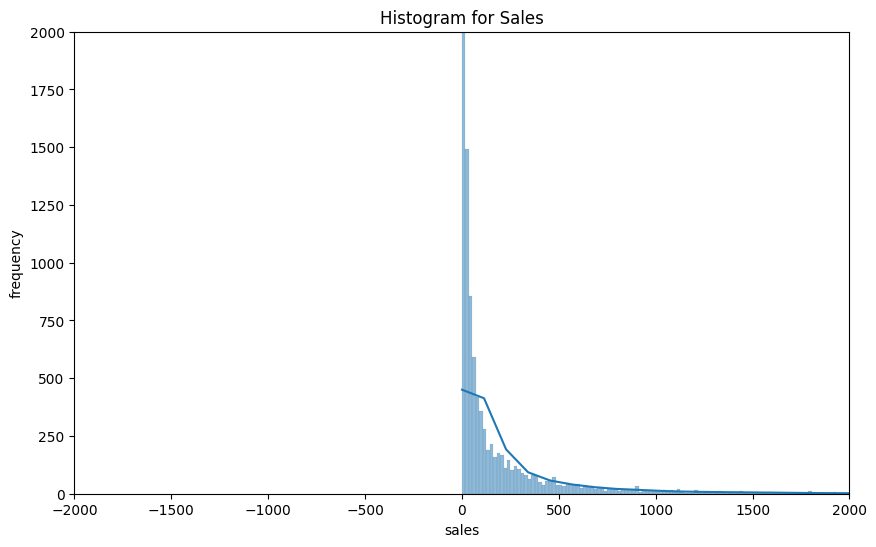

In [1325]:
# The Frequency distribution for sales columns is Right skewwed
plt.figure(figsize=(10,6))
sns.histplot(df['sales'],kde=True)
plt.title('Histogram for Sales')
plt.xlabel('sales')
plt.ylabel('frequency')
plt.ylim(0, 2000)
plt.xlim(-2000, 2000)
plt.show()


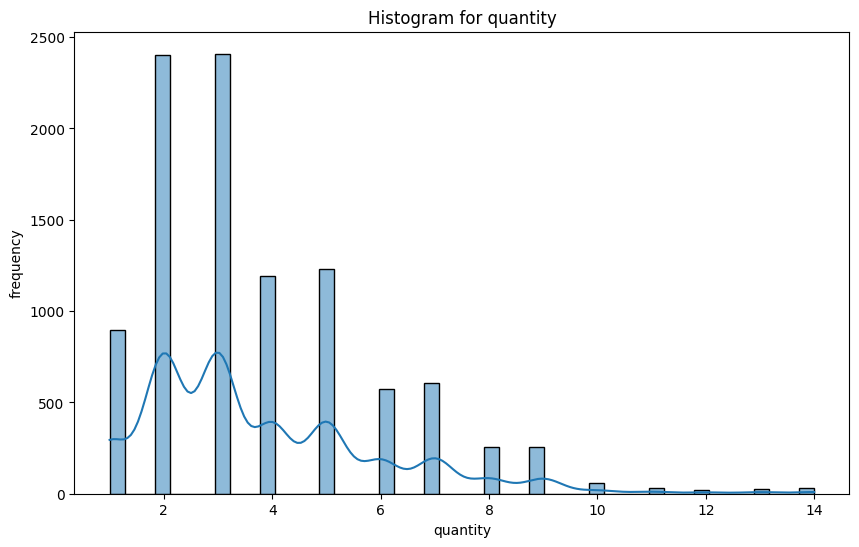

In [1326]:
# The Frequency distribution for quantity column has no pattern
plt.figure(figsize=(10,6))
sns.histplot(df['quantity'],kde=True)
plt.title('Histogram for quantity')
plt.xlabel('quantity')
plt.ylabel('frequency')
#plt.ylim(0, 2000)
#plt.xlim(0, 5000)
plt.show()


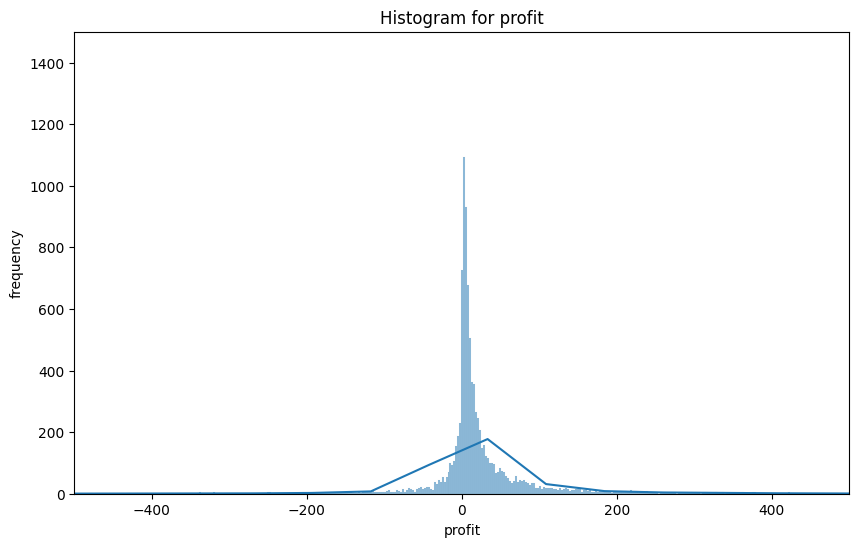

In [1327]:
# The Frequency distribution for profit column has somewhat symmetric pattern
plt.figure(figsize=(10,6))
sns.histplot(df['profit'],kde=True)
plt.title('Histogram for profit')
plt.xlabel('profit')
plt.ylabel('frequency')
plt.ylim(0, 1500)
plt.xlim(-500, 500)
plt.show()

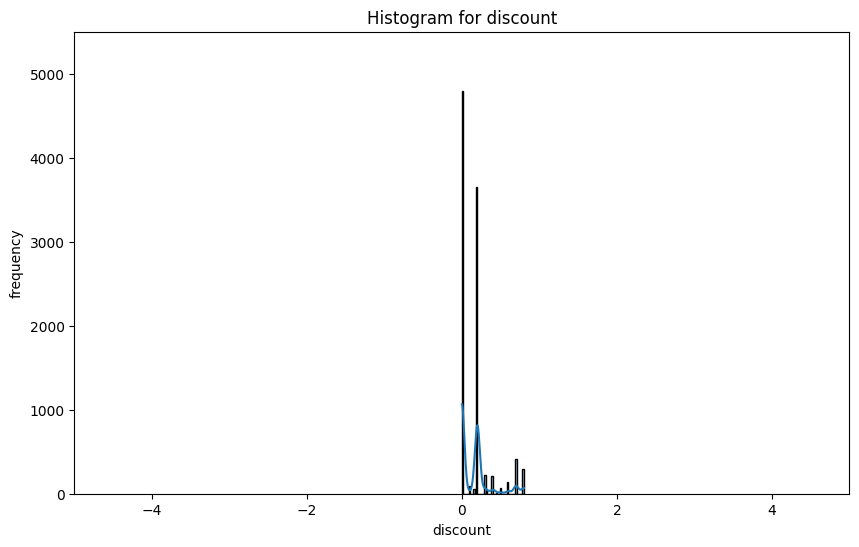

In [1328]:
# The Frequency distribution for discount column has right skewwed distribution
plt.figure(figsize=(10,6))
sns.histplot(df['discount'],kde=True)
plt.title('Histogram for discount')
plt.xlabel('discount')
plt.ylabel('frequency')
plt.ylim(0, 5500)
plt.xlim(-5, 5)
plt.show()

The insights achieved from above graphs, help us undertand that there are many outliers in our dataset. And hence we cannot consider K-means algorithm for our clustering technique.

____________________________________________________________________________________________________________________________________________

# 3. Exploratory Data Analysis


Our problem statement mentioned about the supermarket store focusing on improving its Electronics department, so lets try to get some insights into the in-store data.

EDA is necessary, to get better understanding of data and remove not so useful data in cleaning itself(self-preffered).


Some of the questions we can solve using data analysis are :

In [1329]:
#filtering out only electronic data for analysis
electronics_df = df[df['category']=='Technology']

In [1330]:
# Importing warnings library because when we plot graphs we dont want any warnings to be displayed along with it.
import warnings
warnings.filterwarnings("ignore")

3.1 Which segment drives more profit to the store ?

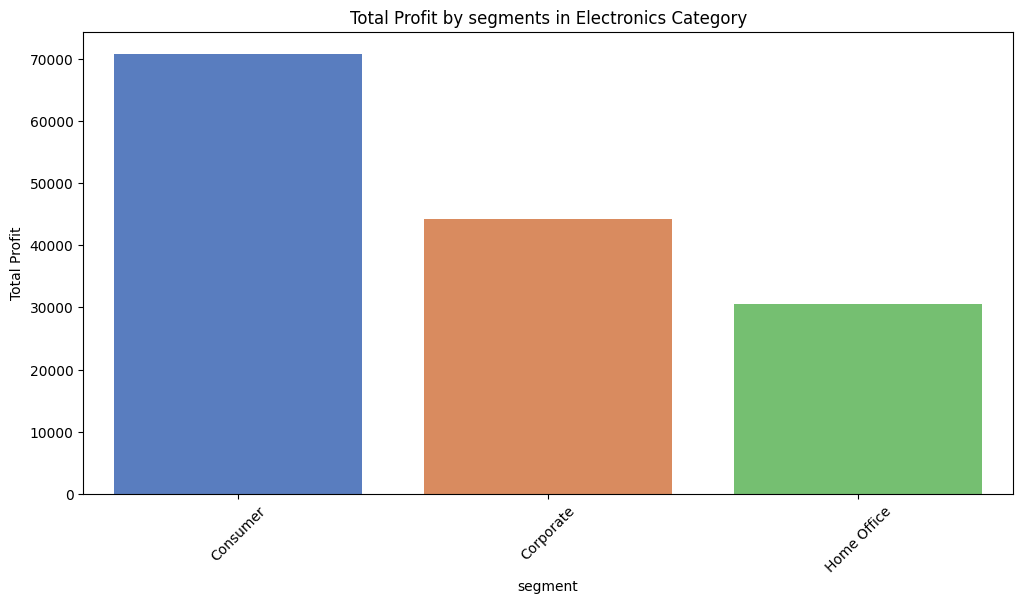

In [1331]:
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='profit', data=electronics_df, estimator=sum, ci=None, palette='muted')
plt.title('Total Profit by segments in Electronics Category')
plt.xlabel('segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

From the above two graphs, we were able to identify the most profit deriving electronic device and segment as well. 

Therefore, the target now is to understand why are segments like Home-Office and Corporate generating less income and what is the issue with Machines sub category not being profitable ?

3.2 Which segment has been offered the most amount of discount ?

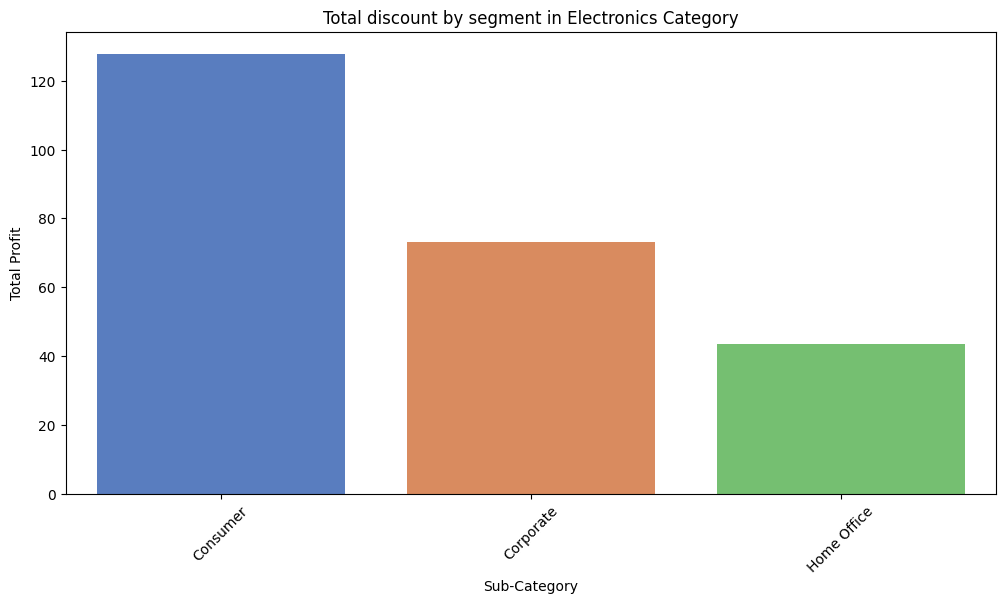

In [1332]:
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='discount', data=electronics_df, estimator=sum, ci=None, palette='muted')
plt.title('Total discount by segment in Electronics Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

Therefore, it can be seen that the consumer segement of the supermarket store is performing well. However, the store needs to identify the issues with related to corporate and Home office segments.

3.3 What is the most valuable sub category within technology/electronics sector ?

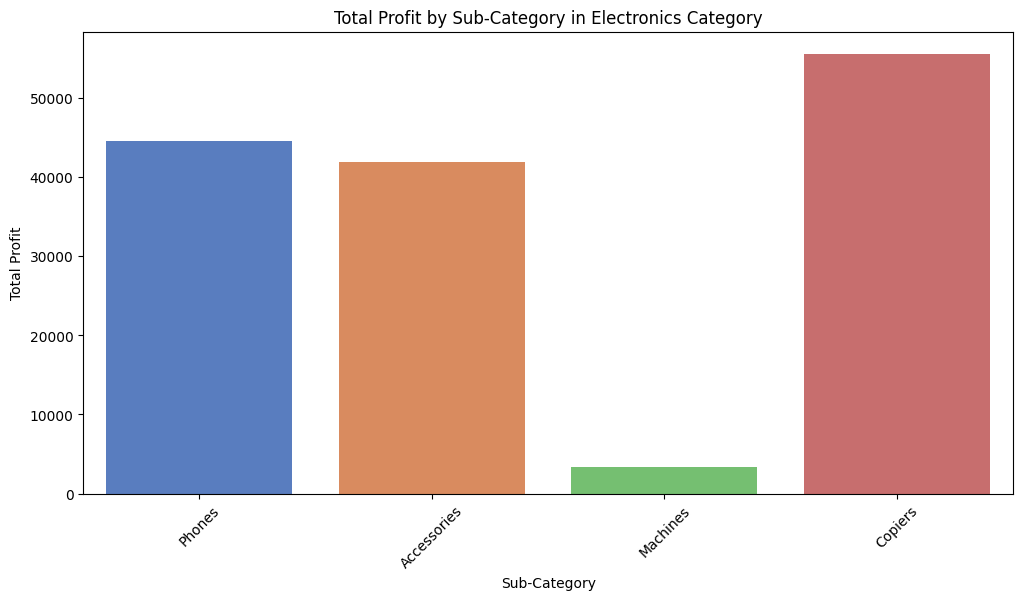

In [1333]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sub_category', y='profit', data=electronics_df, estimator=sum, ci=None, palette='muted')
plt.title('Total Profit by Sub-Category in Electronics Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

3.4 What sub_category has the most sales ?

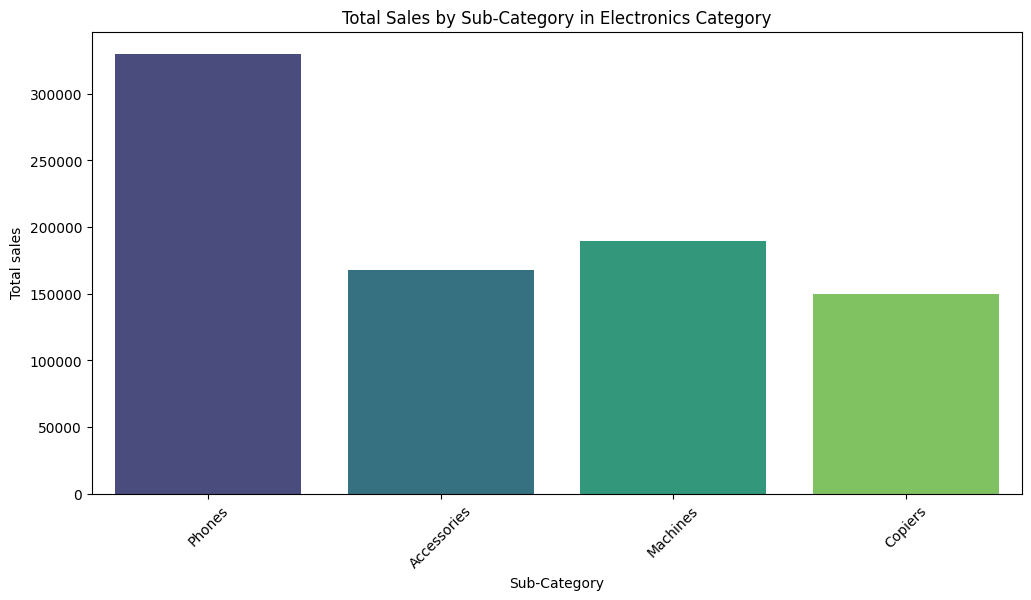

In [1334]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sub_category', y='sales', data=electronics_df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Sub-Category in Electronics Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

Insights from the sub_category graphs : we can say,
1. the sales of phones and profit are directly proportional.
3. Even though sales of Accessories are less, it returns are good.
3. Machines are having the highest sales, however the derive less profit.
4. On the contrary, the profit generated by copiers are much greater than their sales.



Now, lets focus on the machines and dive a bit deeper into the Machines sub_category.

3.5 Which are the machines which are frequently bought ?

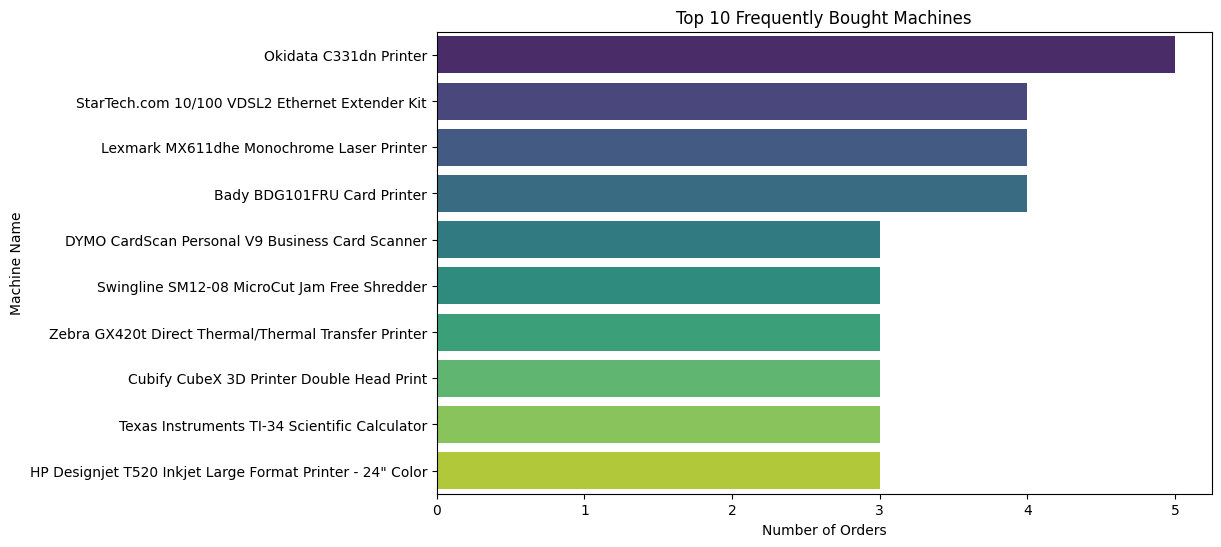

In [1335]:
#inorder to identify the top machines we need to make our dataset more concise.

df_machines = df[(df['category']=='Technology') & (df['sub_category']=='Machines')]
freq_machines = df_machines['product_name'].value_counts().head(10)
df_machines

plt.figure(figsize=(10, 6))
sns.barplot(x=freq_machines.values, y=freq_machines.index, palette='viridis')
plt.title('Top 10 Frequently Bought Machines')
plt.xlabel('Number of Orders')
plt.ylabel('Machine Name')
plt.show()


3.6  Analyze product names and their quantities ordered by month?

In [1336]:
electronics_df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

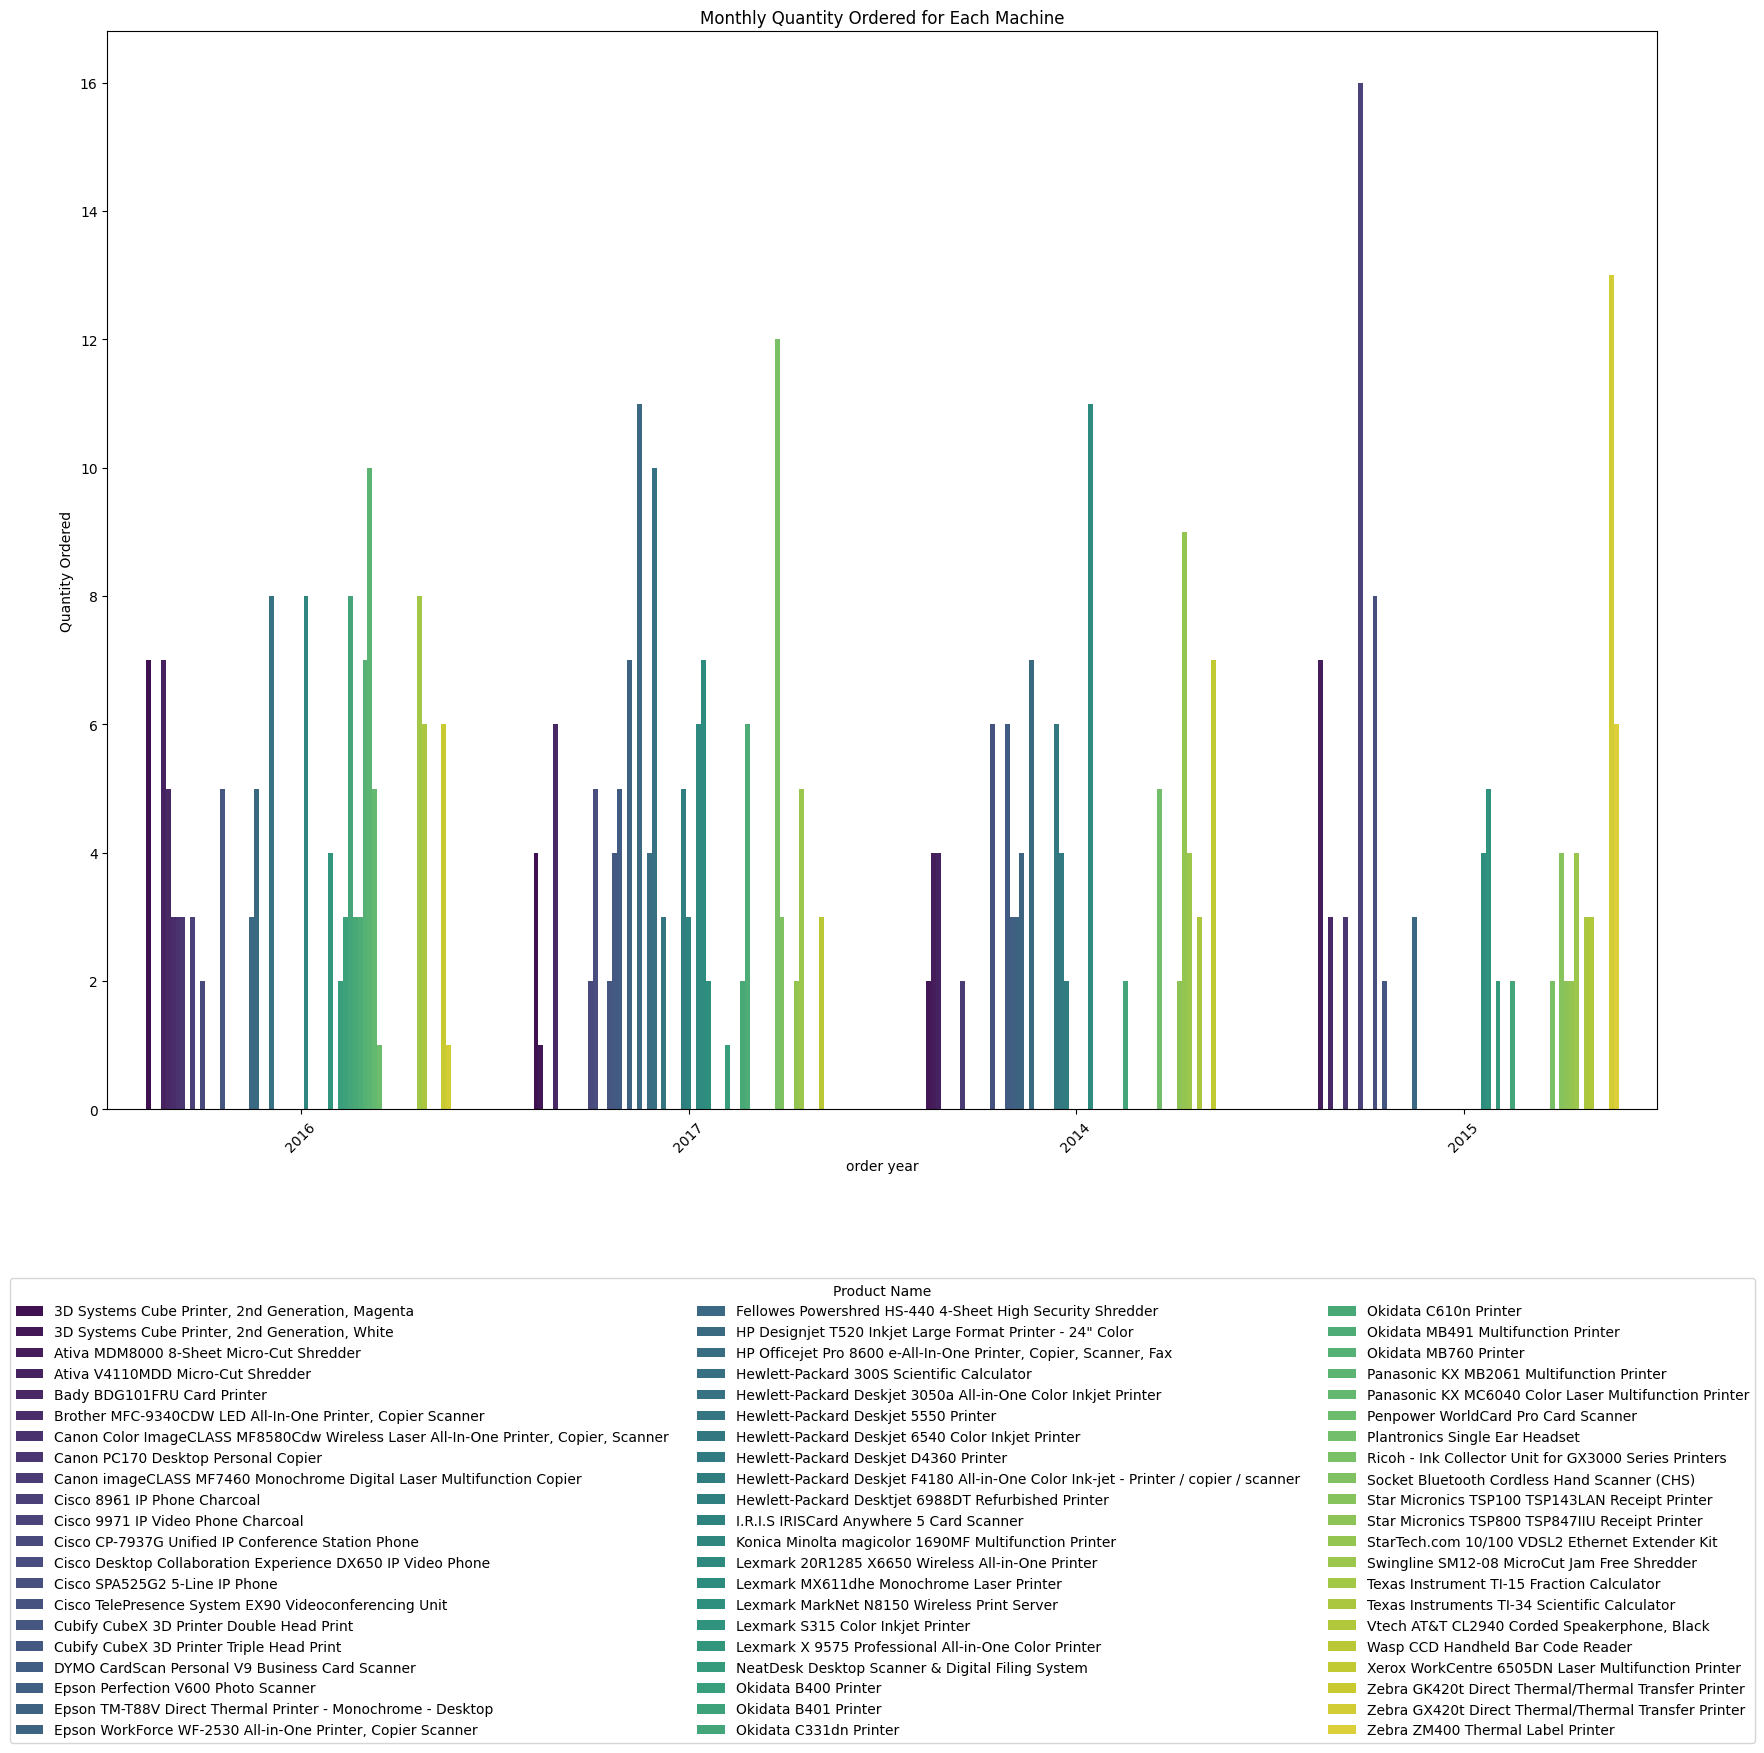

In [1337]:

df_machines = df[(df['category']=='Technology') & (df['sub_category']=='Machines')]

df_machines['order_year'] = df_machines['order_date'].dt.to_period('Y')

month_quant = df_machines.groupby(['product_name','order_year'])['quantity'].sum().reset_index()

plt.figure(figsize=(20, 14))
sns.barplot(x='order_year', y='quantity', hue='product_name', data=month_quant, palette='viridis')
plt.title('Monthly Quantity Ordered for Each Machine')
plt.xlabel('order year')
plt.ylabel('Quantity Ordered')
plt.legend(title='Product Name', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.xticks(rotation=45)
plt.show()

This graphs depicts all the best sold and unsold machines in the year 2014,2015,2016,2017. 

3.7  which are top customer in the machines category ?

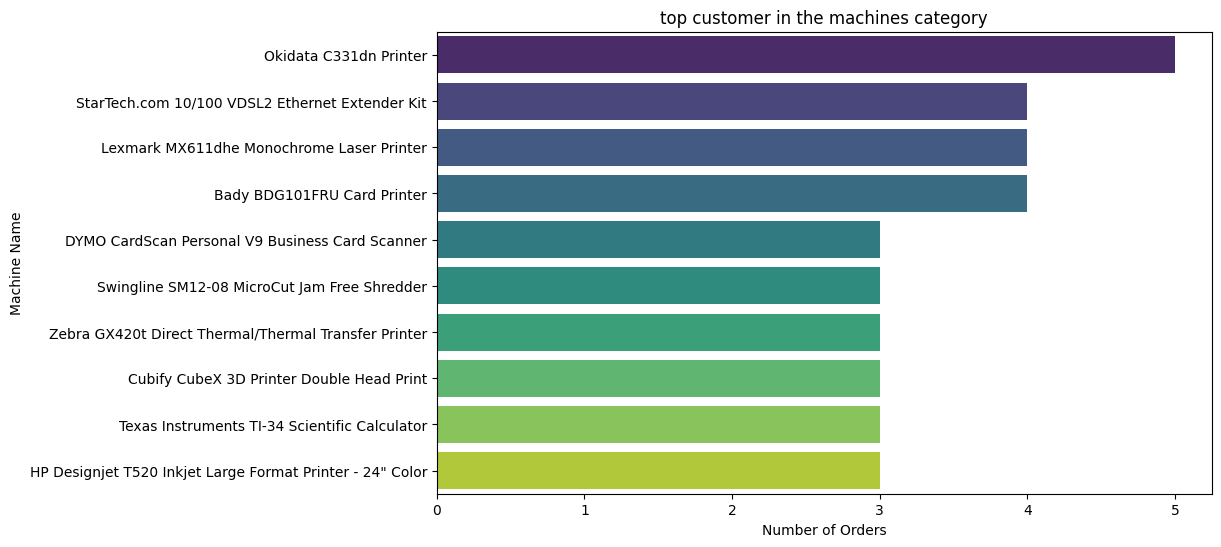

In [1338]:
#inorder to identify the top machines we need to make our dataset more concise.

df_machines = df[(df['category']=='Technology') & (df['sub_category']=='Machines')]
top_cust = df_machines['customer_name'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=freq_machines.values, y=freq_machines.index, palette='viridis')
plt.title('top customer in the machines category')
plt.xlabel('Number of Orders')
plt.ylabel('Machine Name')
plt.show()


The below list of customer names, which can be used to tailor marketing strategies.

In [1339]:
top_cust

customer_name
Sean Braxton      4
Pamela Stobb      3
Cindy Stewart     2
Natalie Webber    2
Clay Ludtke       2
Mick Hernandez    2
Sean Miller       2
Brian Thompson    2
Frank Atkinson    2
John Lee          2
Name: count, dtype: int64

The below code helps us to understand the discount provided to each of the top customers, Likewise the discount could be calculated for lowest customers.

In [1340]:
df_top_cust = df_machines[df_machines['customer_name'].isin(top_cust.index)]
discount_Offered = df_top_cust.groupby('customer_name')['discount'].sum().reset_index()
discount_Offered

,customer_name,discount
0,Brian Thompson,0.4
1,Cindy Stewart,0.7
2,Clay Ludtke,0.4
3,Frank Atkinson,0.9
4,John Lee,0.7
5,Mick Hernandez,0.1
6,Natalie Webber,1.4
7,Pamela Stobb,1.8
8,Sean Braxton,2.2
9,Sean Miller,1.0


_____________________________________________________________________________________________________________________________________

# 4.RFM Analysis

We perform RFM analysis to gain insights and overview of our existing customer  base. 

Recency: How recently has the customer made a transaction with us

Frequency: How frequent is the customer in ordering/buying some product from us

Monetary: How much does the customer spend on purchasing products from us.

In [1341]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Below is the code of recency analysis for customer_name and product_category.

In [1342]:
df_cust_recency = df.groupby(by='customer_name',as_index=False)['order_date'].max()
df_prod_recency = df.groupby(by='sub_category',as_index=False)['ship_date'].max()

df_cust_recency.columns = ['customer_name','LatestPurchaseDate']
df_prod_recency.columns = ['sub_category','LatestShipDate']

recent_cust_date = df_cust_recency['LatestPurchaseDate'].max()
recent_prod_date = df_prod_recency['LatestShipDate'].max()

df_cust_recency['Recency'] = df_cust_recency['LatestPurchaseDate'].apply(lambda x:(recent_cust_date -x).days) # code of lambda reffered from GFG
df_prod_recency['Recency'] = df_prod_recency['LatestShipDate'].apply(lambda x:(recent_prod_date -x).days) 


In [1343]:
df_cust_recency

,customer_name,LatestPurchaseDate,Recency
0,Aaron Bergman,2016-11-10,415
1,Aaron Hawkins,2017-12-18,12
2,Aaron Smayling,2017-10-03,88
3,Adam Bellavance,2017-11-06,54
4,Adam Hart,2017-11-26,34
...,...,...,...
788,Xylona Preis,2017-11-17,43
789,Yana Sorensen,2017-12-21,9
790,Yoseph Carroll,2017-12-26,4
791,Zuschuss Carroll,2017-11-06,54


In [1344]:
df_prod_recency

,sub_category,LatestShipDate,Recency
0,Accessories,2017-12-30,6
1,Appliances,2018-01-05,0
2,Art,2018-01-02,3
3,Binders,2018-01-04,1
4,Bookcases,2018-01-03,2
5,Chairs,2018-01-02,3
6,Copiers,2017-12-25,11
7,Envelopes,2017-12-28,8
8,Fasteners,2018-01-04,1
9,Furnishings,2018-01-05,0


Next, we dive into frequency analysis of both customer and product base for the supermarket store.

In [1345]:
df_cust_freq  = df.drop_duplicates().groupby(by='customer_name',as_index=False)['order_date'].count()
df_prod_freq  = df.drop_duplicates().groupby(by='sub_category',as_index=False)['order_date'].count()

df_cust_freq.columns = ['customer_name','Frequency']
df_prod_freq.columns = ['sub_category','Frequency']


In [1346]:
df_cust_freq

,customer_name,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20
...,...,...
788,Xylona Preis,28
789,Yana Sorensen,12
790,Yoseph Carroll,8
791,Zuschuss Carroll,31


In [1347]:
df_prod_freq

,sub_category,Frequency
0,Accessories,775
1,Appliances,466
2,Art,796
3,Binders,1523
4,Bookcases,228
5,Chairs,616
6,Copiers,68
7,Envelopes,254
8,Fasteners,217
9,Furnishings,957


Lastly, we derive the monetary aspect of customer and product base. 

In [1348]:
df['total'] = df['sales']*df['quantity']
df_cust_mon = df.groupby(by='customer_name', as_index=False)['total'].sum()
df_cust_mon.columns = ['customer_name', 'Monetary'] 
df_prod_mon = df.groupby(by='sub_category',as_index=False)['profit'].sum()
df_prod_mon.columns=['sub_category','Monetary']

In [1349]:
df_cust_mon

,customer_name,Monetary
0,Aaron Bergman,1984.480
1,Aaron Hawkins,11459.552
2,Aaron Smayling,9088.880
3,Adam Bellavance,35390.580
4,Adam Hart,9664.265
...,...,...
788,Xylona Preis,8676.214
789,Yana Sorensen,46478.992
790,Yoseph Carroll,27208.926
791,Zuschuss Carroll,40212.889


In [1350]:
df_prod_mon

,sub_category,Monetary
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


Merging RFM dataframe of customer and product seprately !

In [1351]:
#Customers RFM analysis
df_cust_rf = df_cust_recency.merge(df_cust_freq,on='customer_name')
df_cust_rfm = df_cust_rf.merge(df_cust_mon,on='customer_name').drop(
    columns='LatestPurchaseDate')
df_cust_rfm.head()


,customer_name,Recency,Frequency,Monetary
0,Aaron Bergman,415,6,1984.480
1,Aaron Hawkins,12,11,11459.552
2,Aaron Smayling,88,10,9088.880
3,Adam Bellavance,54,18,35390.580
4,Adam Hart,34,20,9664.265


In [1352]:
df_cust_rfm['R_rank'] = df_cust_rfm['Recency'].rank(ascending=False)
df_cust_rfm['F_rank'] = df_cust_rfm['Recency'].rank(ascending=False)
df_cust_rfm['M_rank'] = df_cust_rfm['Recency'].rank(ascending=False)

#normalizing rank, reffered from GFG
df_cust_rfm['R_rank_norm'] =(df_cust_rfm['R_rank']/df_cust_rfm['R_rank'].max())*100
df_cust_rfm['F_rank_norm'] =(df_cust_rfm['F_rank']/df_cust_rfm['F_rank'].max())*100
df_cust_rfm['M_rank_norm'] =(df_cust_rfm['M_rank']/df_cust_rfm['M_rank'].max())*100

df_cust_rfm.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
df_cust_rfm.head()


,customer_name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,415,6,1984.480,9.033481,9.033481,9.033481
1,Aaron Hawkins,12,11,11459.552,90.524321,90.524321,90.524321
2,Aaron Smayling,88,10,9088.880,46.178143,46.178143,46.178143
3,Adam Bellavance,54,18,35390.580,59.444093,59.444093,59.444093
4,Adam Hart,34,20,9664.265,72.899558,72.899558,72.899558


Now, we will rate all the customers on the scale of 1 to 5. 

We do so using below formula : rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [1353]:
df_cust_rfm['RFM_cust_Score'] = 0.15*df_cust_rfm['R_rank_norm']+0.28*df_cust_rfm['F_rank_norm']+0.57*df_cust_rfm['M_rank_norm']
df_cust_rfm['RFM_cust_Score'] *=0.05
df_cust_rfm =df_cust_rfm.round(2)
df_cust_rfm[['customer_name','RFM_cust_Score']].head()

,customer_name,RFM_cust_Score
0,Aaron Bergman,0.45
1,Aaron Hawkins,4.53
2,Aaron Smayling,2.31
3,Adam Bellavance,2.97
4,Adam Hart,3.64


Rating Customer based upon the RFM score

rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [1354]:
df_cust_rfm['Customer_segment'] = np.where(
    df_cust_rfm['RFM_cust_Score'] > 4.5, "Top Customers",
    np.where(
        df_cust_rfm['RFM_cust_Score'] > 4, "High Value Customer",
        np.where(
            df_cust_rfm['RFM_cust_Score'] > 3, "Medium Value Customer",
            np.where(
                df_cust_rfm['RFM_cust_Score'] > 1.6, "Low Value Customers",
                "Lost Customers"
            )
        )
    )
)

df_cust_rfm[['customer_name', 'RFM_cust_Score', 'Customer_segment']].head()


,customer_name,RFM_cust_Score,Customer_segment
0,Aaron Bergman,0.45,Lost Customers
1,Aaron Hawkins,4.53,Top Customers
2,Aaron Smayling,2.31,Low Value Customers
3,Adam Bellavance,2.97,Low Value Customers
4,Adam Hart,3.64,Medium Value Customer


The customer RFM analysis code is reffered from GFG : https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

However, the product RFM analysis is performed by making use of the reff.

Merging RFM dataframe of product  seprately !


In [1355]:
#Product RFM analysis
df_prod_rf = df_prod_recency.merge(df_prod_freq,on='sub_category')
df_prod_rfm = df_prod_rf.merge(df_prod_mon,on='sub_category').drop(columns='LatestShipDate')
df_prod_rfm.head()

,sub_category,Recency,Frequency,Monetary
0,Accessories,6,775,41936.6357
1,Appliances,0,466,18138.0054
2,Art,3,796,6527.7870
3,Binders,1,1523,30221.7633
4,Bookcases,2,228,-3472.5560


In [1356]:
df_prod_rfm['R_rank'] = df_prod_rfm['Recency'].rank(ascending=False)
df_prod_rfm['F_rank'] = df_prod_rfm['Recency'].rank(ascending=False)
df_prod_rfm['M_rank'] = df_prod_rfm['Recency'].rank(ascending=False)

#normalizing rank, reffered from GFG
df_prod_rfm['R_rank_norm'] =(df_prod_rfm['R_rank']/df_prod_rfm['R_rank'].max())*100
df_prod_rfm['F_rank_norm'] =(df_prod_rfm['F_rank']/df_prod_rfm['F_rank'].max())*100
df_prod_rfm['M_rank_norm'] =(df_prod_rfm['M_rank']/df_prod_rfm['M_rank'].max())*100

df_prod_rfm.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
df_prod_rfm.head()

,sub_category,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Accessories,6,775,41936.6357,27.272727,27.272727,27.272727
1,Appliances,0,466,18138.0054,100.000000,100.000000,100.000000
2,Art,3,796,6527.7870,45.454545,45.454545,45.454545
3,Binders,1,1523,30221.7633,78.787879,78.787879,78.787879
4,Bookcases,2,228,-3472.5560,57.575758,57.575758,57.575758


Now, the only difference between the customer and product RFM, will be the parameters. We will rate the category on the scale of 1 to 5.

In [1357]:
df_prod_rfm['RFM_prod_Score'] = 0.15*df_prod_rfm['R_rank_norm']+0.28*df_prod_rfm['F_rank_norm']+0.57*df_prod_rfm['M_rank_norm']
df_prod_rfm['RFM_prod_Score'] *=0.05
df_prod_rfm =df_prod_rfm.round(2)
df_prod_rfm[['sub_category','RFM_prod_Score']].head()

,sub_category,RFM_prod_Score
0,Accessories,1.36
1,Appliances,5.00
2,Art,2.27
3,Binders,3.94
4,Bookcases,2.88


Rating Customer based upon the RFM score

rfm score >4.5 : Top Product

4.5 > rfm score > 4 : High Value Product

4>rfm score >3 : Medium value Product

3>rfm score>1.6 : Low-value Product

rfm score<1.6 :Lost Product

In [1362]:
df_prod_rfm['Product_segment'] = np.where(
    df_prod_rfm['RFM_prod_Score'] > 4.5, "Top value Product",
    np.where(
        df_prod_rfm['RFM_prod_Score'] > 4, "High Value Product",
        np.where(
            df_prod_rfm['RFM_prod_Score'] > 3, "Medium Value Product",
            np.where(
                df_prod_rfm['RFM_prod_Score'] > 1.6, "Low Value Product",
                "Lost value Product"
            )
        )
    )
)

df_prod_rfm[['sub_category', 'RFM_prod_Score', 'Product_segment']].head()

,sub_category,RFM_prod_Score,Product_segment
0,Accessories,1.36,Lost value Product
1,Appliances,5.00,Top value Product
2,Art,2.27,Low Value Product
3,Binders,3.94,Medium Value Product
4,Bookcases,2.88,Low Value Product


In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.8875
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.7360


_______________________________________________________________________________________________________________________________________________

# 5. Data Transformation

In [ ]:
#columns_drop =['order_date','ship_date','customer_id','order_id','product_id','product_name','customer_name']
df = df.drop(columns=columns_drop)

In [ ]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.dayofweek
df['ship_year'] = df['order_date'].dt.year
df['ship_month'] = df['order_date'].dt.month
df['ship_day'] = df['order_date'].dt.dayofweek

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,quantity,discount,profit,total,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2,0.00,41.9136,523.9200,2016,11,1,2016,11,1
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,3,0.00,219.5820,2195.8200,2016,11,1,2016,11,1
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,2,0.00,6.8714,29.2400,2016,6,6,2016,6,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,5,0.45,-383.0310,4787.8875,2015,10,6,2015,10,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,2,0.20,2.5164,44.7360,2015,10,6,2015,10,6


In [ ]:
df.dtypes

order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
total                   float64
order_year                int32
order_month               int32
order_day                 int32
ship_year                 int32
ship_month                int32
ship_day                  int32
dtype: object

Dropping columns like 'order_date','ship_date','customer_id','order_id','product_id','prodcu_name','customer_name', as they do not provide customer behaviour or preferences. Id's can introduce unecessary noise and complexity to the clustering process !

In [ ]:
columns_drop =['order_date','ship_date','customer_id','order_id','product_id','product_name','customer_name']
df = df.drop(columns=columns_drop)

In [ ]:
col = df.columns
cats_Col= []
nums_Col = []
for i in col:
    if df[i].dtypes == object:
        cats_Col.append(i)
    else:
     nums_Col.append(i)

In [ ]:
cats_Col

['ship_mode',
 'segment',
 'country',
 'city',
 'state',
 'region',
 'category',
 'sub_category']

In [ ]:
encoded_df = pd.DataFrame()

for col in cats_Col:
    encoded = pd.get_dummies(df[col],prefix=col)
    encoded_df = pd.concat([encoded_df,encoded],axis =1)


df = pd.concat([encoded_df, df[nums_Col]], axis=1)

In [ ]:
df.head()

,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,segment_Consumer,segment_Corporate,segment_Home Office,country_United States,city_Aberdeen,city_Abilene,...,quantity,discount,profit,total,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,False,False,True,False,True,False,False,True,False,False,...,2,0.00,41.9136,523.9200,2016,11,1,2016,11,1
1,False,False,True,False,True,False,False,True,False,False,...,3,0.00,219.5820,2195.8200,2016,11,1,2016,11,1
2,False,False,True,False,False,True,False,True,False,False,...,2,0.00,6.8714,29.2400,2016,6,6,2016,6,6
3,False,False,False,True,True,False,False,True,False,False,...,5,0.45,-383.0310,4787.8875,2015,10,6,2015,10,6
4,False,False,False,True,True,False,False,True,False,False,...,2,0.20,2.5164,44.7360,2015,10,6,2015,10,6


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)


In [ ]:
df.head()

,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,segment_Consumer,segment_Corporate,segment_Home Office,country_United States,city_Aberdeen,city_Abilene,...,quantity,discount,profit,total,order_year,order_month,order_day,ship_year,ship_month,ship_day
0,-0.426477,-0.239696,2.034282,-1.217524,0.961902,-0.658055,-0.465991,0.0,-0.010004,-0.010004,...,-0.804303,-0.756643,0.056593,-0.160467,0.247234,0.971327,-1.039337,0.247234,0.971327,-1.039337
1,-0.426477,-0.239696,2.034282,-1.217524,0.961902,-0.658055,-0.465991,0.0,-0.010004,-0.010004,...,-0.354865,-0.756643,0.815054,0.268393,0.247234,0.971327,-1.039337,0.247234,0.971327,-1.039337
2,-0.426477,-0.239696,2.034282,-1.217524,-1.039607,1.519629,-0.465991,0.0,-0.010004,-0.010004,...,-0.804303,-0.756643,-0.093002,-0.287358,0.247234,-0.550979,1.316022,0.247234,-0.550979,1.316022
3,-0.426477,-0.239696,-0.491574,0.821339,0.961902,-0.658055,-0.465991,0.0,-0.010004,-0.010004,...,0.544012,1.423149,-1.757484,0.933287,-0.642843,0.666866,1.316022,-0.642843,0.666866,1.316022
4,-0.426477,-0.239696,-0.491574,0.821339,0.961902,-0.658055,-0.465991,0.0,-0.010004,-0.010004,...,-0.804303,0.212153,-0.111593,-0.283383,-0.642843,0.666866,1.316022,-0.642843,0.666866,1.316022


In [ ]:
df.shape


(9994, 624)